In [8]:
!pip install scikit-image

     |████████████████████████████████| 13.9 MB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 124.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 104.5 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 87.9 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 92.2 MB/s eta 0:00:01


In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 定义一个字典存储所有图片
cubes_images = {}

# 定义顶层文件夹路径
top_dir = "cubes/"

# 遍历顶层文件夹下的所有子文件夹
for i, folder in enumerate(sorted(os.listdir(top_dir))):
    folder_path = os.path.join(top_dir, folder)
    # 确保路径是一个文件夹
    if os.path.isdir(folder_path):
        cubes_images[i] = {}
        # 遍历子文件夹中的所有文件
        for file in sorted(os.listdir(folder_path)):
            if file.endswith(".png") and "right" not in file.lower():  # 跳过包含 "right" 的文件，因为该面没有字符
                # 提取文件名（不含扩展名）
                file_name = os.path.splitext(file)[0]
                file_path = os.path.join(folder_path, file)
                # 使用 PIL.Image 打开图片并存储
                image = Image.open(file_path)
                cubes_images[i][file_name] = image

# 验证结果
for i in cubes_images:
    print(f"Folder {i} contains {len(cubes_images[i])} images.")


Folder 0 contains 5 images.
Folder 1 contains 5 images.
Folder 2 contains 5 images.
Folder 3 contains 5 images.
Folder 4 contains 5 images.
Folder 5 contains 5 images.
Folder 6 contains 5 images.
Folder 7 contains 5 images.
Folder 8 contains 5 images.
Folder 9 contains 5 images.
Folder 10 contains 5 images.
Folder 11 contains 5 images.
Folder 12 contains 5 images.
Folder 13 contains 5 images.
Folder 14 contains 5 images.
Folder 15 contains 5 images.
Folder 16 contains 5 images.
Folder 17 contains 5 images.
Folder 18 contains 5 images.
Folder 19 contains 5 images.
Folder 20 contains 5 images.
Folder 21 contains 5 images.
Folder 22 contains 5 images.
Folder 23 contains 5 images.
Folder 24 contains 5 images.
Folder 25 contains 5 images.
Folder 26 contains 5 images.
Folder 27 contains 5 images.


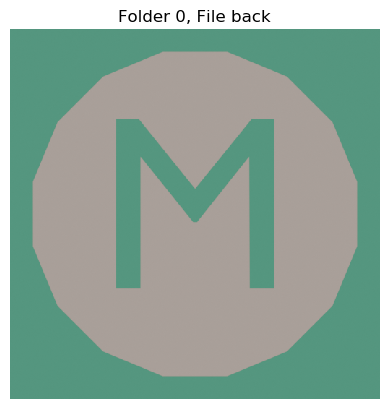

In [2]:
# 显示一个图像示例
example_i = 0  # 选择子文件夹序号
example_j = list(cubes_images[example_i].keys())[0]  # 选择文件名的第一个

# 获取对应图像
example_image = cubes_images[example_i][example_j]

# 使用 matplotlib 显示图片
plt.imshow(example_image)
plt.title(f"Folder {example_i}, File {example_j}")
plt.axis("off")
plt.show()

## 2.1 对比两个图像的相似度

In [3]:
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
test_image = np.array(Image.open("test.png"))  # 加载彩色图像
top_image = np.array(Image.open("cubes/2/top.png"))  # 加载彩色图像

# 调整两张图像为相同尺寸
height, width, _ = test_image.shape
top_image_resized = np.array(
    Image.fromarray(top_image).resize((width, height), Image.Resampling.LANCZOS)
)

# 初始化总相似性分数
total_similarity = 0

# 对每个通道分别计算 SSIM
for i in range(3):  # 对 RGB 三个通道分别计算
    similarity, _ = ssim(test_image[:, :, i], top_image_resized[:, :, i], full=True)
    total_similarity += similarity

# 计算平均相似度
average_similarity = total_similarity / 3

print(f"Average Structural Similarity Index (SSIM): {average_similarity}")


Average Structural Similarity Index (SSIM): 0.40701880282301084


# 2.2 全局对比，选出显著性最高的几个

Dynamic Threshold (90th Percentile): 0.5734
Significant Matches (Sorted by Similarity):
1. Folder 0, Image left, Angle 0°, Similarity: 0.6378
2. Folder 19, Image left, Angle 0°, Similarity: 0.6378
3. Folder 6, Image left, Angle 270°, Similarity: 0.5934
4. Folder 17, Image left, Angle 180°, Similarity: 0.5916
5. Folder 23, Image left, Angle 180°, Similarity: 0.5886
6. Folder 8, Image left, Angle 0°, Similarity: 0.5853
7. Folder 22, Image left, Angle 180°, Similarity: 0.5850
8. Folder 15, Image left, Angle 90°, Similarity: 0.5848
9. Folder 18, Image left, Angle 270°, Similarity: 0.5837
10. Folder 25, Image left, Angle 0°, Similarity: 0.5818
11. Folder 13, Image left, Angle 90°, Similarity: 0.5801
12. Folder 16, Image left, Angle 270°, Similarity: 0.5765
13. Folder 5, Image left, Angle 270°, Similarity: 0.5762
14. Folder 10, Image left, Angle 0°, Similarity: 0.5761


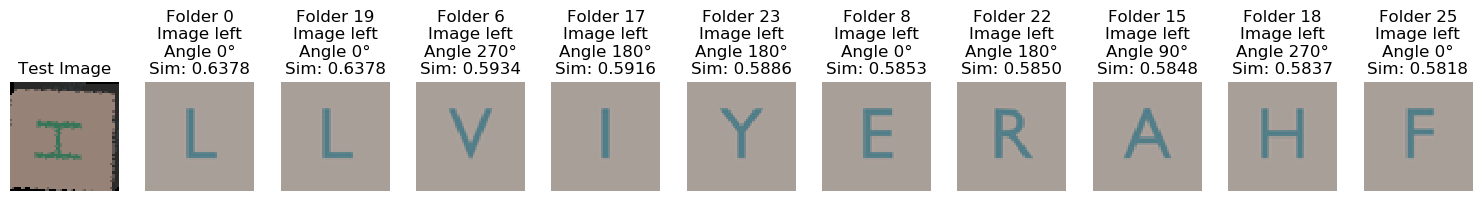

In [4]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import matplotlib.pyplot as plt

# 加载 test.png 图像
test_image = np.array(Image.open("test.png"))  # 加载彩色图像

# 定义旋转角度
rotation_angles = [0, 90, 180, 270]

# 创建不同旋转角度的 test_image 并存储在内存中
rotated_test_images = {}
for angle in rotation_angles:
    rotated_test_images[angle] = np.array(
        Image.fromarray(test_image).rotate(angle, resample=Image.Resampling.BICUBIC)
    )

# 初始化存储所有图片的最佳相似度及对应信息的列表
similarity_results = []

# 遍历 cubes_images 中的所有图片
for i in cubes_images:
    for j in cubes_images[i]:
        # 加载当前图片
        current_image = np.array(cubes_images[i][j])  # 转为 numpy 数组

        # 调整大小以匹配 test_image 的尺寸
        height, width, _ = test_image.shape
        current_image_resized = np.array(
            Image.fromarray(current_image).resize((width, height), Image.Resampling.LANCZOS)
        )

        # 初始化变量存储当前图片的最佳相似度和角度
        best_similarity = -1
        best_angle = 0

        # 比较 current_image 与不同旋转角度的 test_image
        for angle, rotated_test_image in rotated_test_images.items():
            # 初始化通道相似度
            total_similarity = 0

            # 对每个通道分别计算 SSIM
            for c in range(3):  # 对 RGB 三个通道分别计算
                similarity, _ = ssim(current_image_resized[:, :, c], rotated_test_image[:, :, c], full=True)
                total_similarity += similarity

            # 计算平均相似度
            average_similarity = total_similarity / 3

            # 更新最佳相似度和对应角度
            if average_similarity > best_similarity:
                best_similarity = average_similarity
                best_angle = angle

        # 保存当前图片的最佳相似度及其索引和角度
        similarity_results.append((best_similarity, i, j, best_angle))

# 提取相似度分数并计算动态阈值（90th 百分位）
similarities = [result[0] for result in similarity_results]
dynamic_threshold = np.percentile(similarities, 90)

# 提取显著性结果（超过动态阈值）
significant_results = [result for result in similarity_results if result[0] > dynamic_threshold]

# 按相似度降序排序显著性结果
significant_results.sort(key=lambda x: x[0], reverse=True)

# 限制显著性图片最多显示 10 个
max_display = 10
display_results = significant_results[:max_display]

# 打印显著性结果
print(f"Dynamic Threshold (90th Percentile): {dynamic_threshold:.4f}")
print("Significant Matches (Sorted by Similarity):")
for rank, (score, folder, image_name, angle) in enumerate(significant_results, start=1):
    print(f"{rank}. Folder {folder}, Image {image_name}, Angle {angle}°, Similarity: {score:.4f}")

# 可视化显著性结果（最多 10 个），并在最前面显示 test_image
plt.figure(figsize=(15, 6))

# 显示 test_image
plt.subplot(1, len(display_results) + 1, 1)
plt.imshow(test_image)
plt.title("Test Image")
plt.axis("off")

# 显示显著性图片
for idx, (score, folder, image_name, angle) in enumerate(display_results):
    # 加载当前图片
    current_image = np.array(cubes_images[folder][image_name])  # 转为 numpy 数组

    # 调整大小
    current_image_resized = np.array(
        Image.fromarray(current_image).resize((width, height), Image.Resampling.LANCZOS)
    )

    # 显示图片
    plt.subplot(1, len(display_results) + 1, idx + 2)
    plt.imshow(current_image_resized)
    plt.title(f"Folder {folder}\nImage {image_name}\nAngle {angle}°\nSim: {score:.4f}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# 2.3 打包成函数

In [1]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import matplotlib.pyplot as plt

def find_similar_images(test_image_path, cubes_images, debug_show=False):
    """
    比较 test_image 与 cubes_images 中的所有图片，并返回相似度结果。
    
    Args:
        test_image_path (str): 测试图片路径。
        cubes_images (dict): 包含待比较图片的字典，按 [i][j] 组织。
        debug_show (bool): 是否显示显著性图片，默认 False。
    
    Returns:
        list: 返回降序的相似度结果，每项为 [i, j, similarity]。
    """
    # 加载测试图片
    test_image = np.array(Image.open(test_image_path))  # 加载彩色图像

    # 定义旋转角度
    rotation_angles = [0, 90, 180, 270]

    # 创建不同旋转角度的 test_image 并存储在内存中
    rotated_test_images = {}
    for angle in rotation_angles:
        rotated_test_images[angle] = np.array(
            Image.fromarray(test_image).rotate(angle, resample=Image.Resampling.BICUBIC)
        )

    # 初始化存储所有图片的最佳相似度及对应信息的列表
    similarity_results = []

    # 遍历 cubes_images 中的所有图片
    for i in cubes_images:
        for j in cubes_images[i]:
            # 加载当前图片
            current_image = np.array(cubes_images[i][j])  # 转为 numpy 数组

            # 调整大小以匹配 test_image 的尺寸
            height, width, _ = test_image.shape
            current_image_resized = np.array(
                Image.fromarray(current_image).resize((width, height), Image.Resampling.LANCZOS)
            )

            # 初始化变量存储当前图片的最佳相似度和角度
            best_similarity = -1
            best_angle = 0

            # 比较 current_image 与不同旋转角度的 test_image
            for angle, rotated_test_image in rotated_test_images.items():
                # 初始化通道相似度
                total_similarity = 0

                # 对每个通道分别计算 SSIM
                for c in range(3):  # 对 RGB 三个通道分别计算
                    similarity, _ = ssim(current_image_resized[:, :, c], rotated_test_image[:, :, c], full=True)
                    total_similarity += similarity

                # 计算平均相似度
                average_similarity = total_similarity / 3

                # 更新最佳相似度和对应角度
                if average_similarity > best_similarity:
                    best_similarity = average_similarity
                    best_angle = angle

            # 保存当前图片的最佳相似度及其索引和角度
            similarity_results.append((best_similarity, i, j, best_angle))

    # 提取相似度分数并计算动态阈值（90th 百分位）
    similarities = [result[0] for result in similarity_results]
    dynamic_threshold = np.percentile(similarities, 90)

    # 提取显著性结果（超过动态阈值）
    significant_results = [result for result in similarity_results if result[0] > dynamic_threshold]

    # 如果显著性结果少于 max_display，补充更多结果
    max_display = 10
    if len(significant_results) < max_display:
        additional_results = sorted(similarity_results, key=lambda x: x[0], reverse=True)
        significant_results = additional_results[:max_display]

    # 按相似度降序排序显著性结果
    significant_results.sort(key=lambda x: x[0], reverse=True)

    # 如果需要可视化
    if debug_show:
        display_results = significant_results[:max_display]

        plt.figure(figsize=(15, 6))

        # 显示 test_image
        plt.subplot(1, len(display_results) + 1, 1)
        plt.imshow(test_image)
        plt.title("Test Image")
        plt.axis("off")

        # 显示显著性图片
        for idx, (score, folder, image_name, angle) in enumerate(display_results):
            # 加载当前图片
            current_image = np.array(cubes_images[folder][image_name])  # 转为 numpy 数组

            # 调整大小
            current_image_resized = np.array(
                Image.fromarray(current_image).resize((width, height), Image.Resampling.LANCZOS)
            )

            # 显示图片
            plt.subplot(1, len(display_results) + 1, idx + 2)
            plt.imshow(current_image_resized)
            plt.title(f"Folder {folder}\nImage {image_name}\nAngle {angle}°\nSim: {score:.4f}")
            plt.axis("off")

        plt.tight_layout()
        plt.show()

    # 返回降序结果
    return sorted([[res[1], res[2], res[0]] for res in similarity_results], key=lambda x: x[2], reverse=True)

In [ ]:
import time
start_time = time.perf_counter_ns()


results = find_similar_images("test.png", cubes_images, debug_show=True)
# print(results)
results = find_similar_images("test2.png", cubes_images, debug_show=True)
results = find_similar_images("test3.png", cubes_images, debug_show=True)
results = find_similar_images("test4.png", cubes_images, debug_show=True)
results = find_similar_images("test5.png", cubes_images, debug_show=True)


end_time = time.perf_counter_ns()
elapsed_time_ns = end_time - start_time
print(f"Elapsed time: {elapsed_time_ns} ns")


In [28]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed

def process_images_in_folder(folder_index, folder_images, test_image, rotated_test_images):
    """
    处理一个文件夹中的所有图片，与 test_image 对比计算相似度。
    
    Args:
        folder_index (int): 文件夹索引。
        folder_images (dict): 包含待处理图片的字典，键为图片名，值为 PIL.Image 对象。
        test_image (numpy.ndarray): 测试图片的 numpy 数组。
        rotated_test_images (dict): 旋转后的 test_image 字典，按角度存储。
    
    Returns:
        list: 该文件夹中每张图片的相似度结果。
    """
    results = []
    height, width, _ = test_image.shape

    for j, current_image in folder_images.items():
        # 转为 numpy 数组并调整大小
        current_image_resized = np.array(
            Image.fromarray(np.array(current_image)).resize((width, height), Image.Resampling.LANCZOS)
        )

        # 初始化变量存储最佳相似度和角度
        best_similarity = -1
        best_angle = 0

        # 比较图片与不同角度的 test_image
        for angle, rotated_test_image in rotated_test_images.items():
            total_similarity = 0

            for c in range(3):  # 对 RGB 三个通道分别计算 SSIM
                similarity, _ = ssim(current_image_resized[:, :, c], rotated_test_image[:, :, c], full=True)
                total_similarity += similarity

            average_similarity = total_similarity / 3
            if average_similarity > best_similarity:
                best_similarity = average_similarity
                best_angle = angle

        # 保存结果
        results.append((best_similarity, folder_index, j, best_angle))

    return results

def find_similar_images_multithread(test_image_path, cubes_images, debug_show=False):
    """
    比较 test_image 与 cubes_images 中的所有图片，并返回相似度结果（多线程版）。
    
    Args:
        test_image_path (str): 测试图片路径。
        cubes_images (dict): 包含待比较图片的字典，按 [i][j] 组织。
        debug_show (bool): 是否显示显著性图片，默认 False。
    
    Returns:
        list: 返回降序的相似度结果，每项为 [i, j, similarity]。
    """
    # 加载测试图片
    test_image = np.array(Image.open(test_image_path))  # 加载彩色图像

    # 定义旋转角度
    rotation_angles = [0, 90, 180, 270]

    # 创建不同旋转角度的 test_image 并存储在内存中
    rotated_test_images = {
        angle: np.array(
            Image.fromarray(test_image).rotate(angle, resample=Image.Resampling.BICUBIC)
        ) for angle in rotation_angles
    }

    # 使用多线程处理每个文件夹
    similarity_results = []
    with ThreadPoolExecutor() as executor:
        futures = {
            executor.submit(process_images_in_folder, i, cubes_images[i], test_image, rotated_test_images): i
            for i in cubes_images
        }

        for future in as_completed(futures):
            similarity_results.extend(future.result())

    # 提取相似度分数并计算动态阈值（90th 百分位）
    similarities = [result[0] for result in similarity_results]
    dynamic_threshold = np.percentile(similarities, 90)

    # 提取显著性结果（超过动态阈值）
    significant_results = [result for result in similarity_results if result[0] > dynamic_threshold]

    # 如果显著性结果少于 max_display，补充更多结果
    max_display = 10
    if len(significant_results) < max_display:
        additional_results = sorted(similarity_results, key=lambda x: x[0], reverse=True)
        significant_results = additional_results[:max_display]

    # 按相似度降序排序显著性结果
    significant_results.sort(key=lambda x: x[0], reverse=True)

    # 如果需要可视化
    if debug_show:
        display_results = significant_results[:max_display]

        plt.figure(figsize=(15, 6))

        # 显示 test_image
        plt.subplot(1, len(display_results) + 1, 1)
        plt.imshow(test_image)
        plt.title("Test Image")
        plt.axis("off")

        # 显示显著性图片
        for idx, (score, folder, image_name, angle) in enumerate(display_results):
            # 加载当前图片
            current_image = np.array(cubes_images[folder][image_name])  # 转为 numpy 数组

            # 调整大小
            current_image_resized = np.array(
                Image.fromarray(current_image).resize((test_image.shape[1], test_image.shape[0]), Image.Resampling.LANCZOS)
            )

            # 显示图片
            plt.subplot(1, len(display_results) + 1, idx + 2)
            plt.imshow(current_image_resized)
            plt.title(f"Folder {folder}\nImage {image_name}\nAngle {angle}°\nSim: {score:.4f}")
            plt.axis("off")

        plt.tight_layout()
        plt.show()

    # 返回降序结果
    return sorted([[res[1], res[2], res[0]] for res in similarity_results], key=lambda x: x[2], reverse=True)


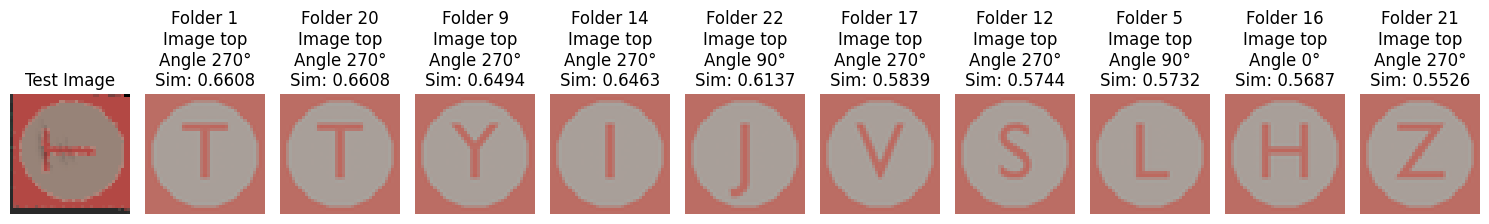

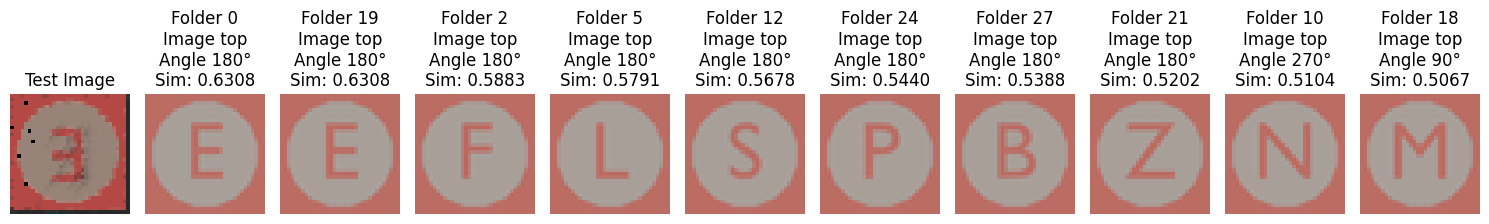

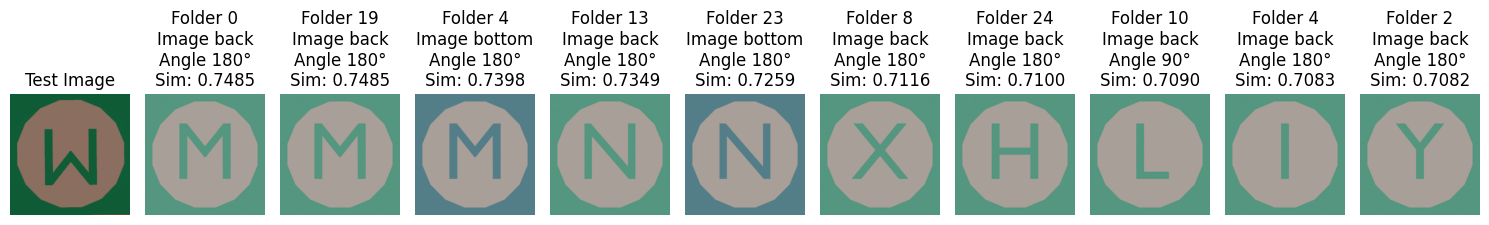

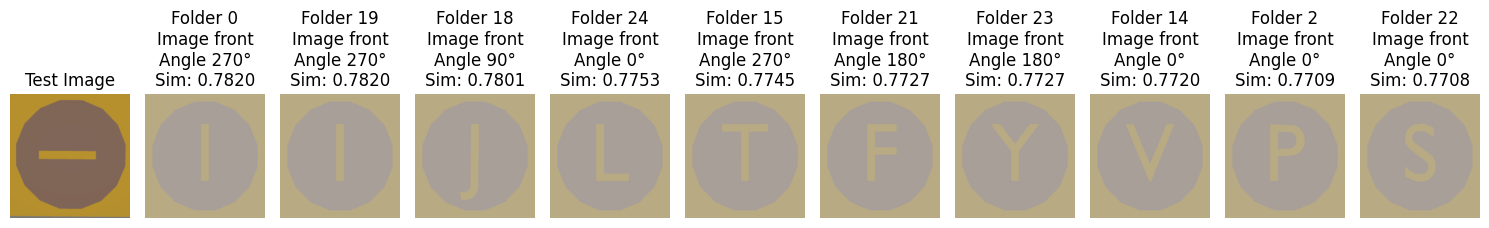

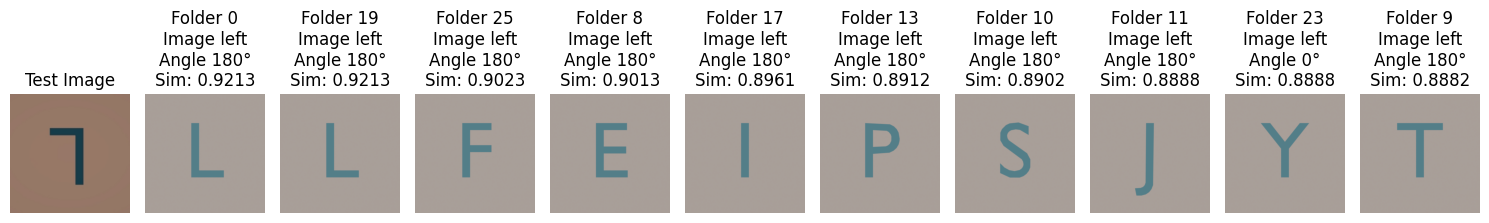

Elapsed time: 8738532900 ns


In [32]:
import time
start_time = time.perf_counter_ns()


results = find_similar_images_multithread("test.png", cubes_images, debug_show=True)
# print(results)
results = find_similar_images_multithread("test2.png", cubes_images, debug_show=True)
results = find_similar_images_multithread("test3.png", cubes_images, debug_show=True)
results = find_similar_images_multithread("test4.png", cubes_images, debug_show=True)
results = find_similar_images_multithread("test5.png", cubes_images, debug_show=True)


end_time = time.perf_counter_ns()
elapsed_time_ns = end_time - start_time
print(f"Elapsed time: {elapsed_time_ns} ns")


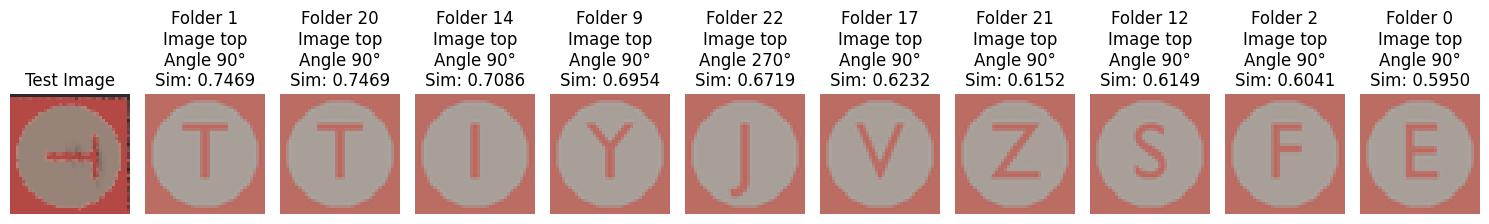

[[1, 'top', 0.7469335567521197],
 [20, 'top', 0.7469335567521197],
 [14, 'top', 0.7086496970985298],
 [9, 'top', 0.6954403110365027],
 [22, 'top', 0.6719440929292716],
 [17, 'top', 0.6232195989629956],
 [21, 'top', 0.6152336022940831],
 [12, 'top', 0.614897950189195],
 [2, 'top', 0.6041002357686146],
 [0, 'top', 0.5950341983712247],
 [19, 'top', 0.5950341983712247],
 [24, 'top', 0.5923223721475995],
 [5, 'top', 0.5904795507762534],
 [16, 'top', 0.5852355537687656],
 [4, 'top', 0.5837115955416404],
 [8, 'top', 0.5793621529306933],
 [15, 'top', 0.5776068163745682],
 [25, 'top', 0.5715369055095202],
 [27, 'top', 0.5668898903247878],
 [26, 'top', 0.5529744346445143],
 [13, 'top', 0.5507879779180015],
 [10, 'top', 0.5476369767155275],
 [18, 'top', 0.5469752907323042],
 [6, 'top', 0.5364700940671323],
 [7, 'top', 0.5296177015540189],
 [3, 'top', 0.516657429317718],
 [15, 'front', 0.5064471393603378],
 [11, 'top', 0.4998051663350662],
 [23, 'top', 0.4966014991629905],
 [0, 'front', 0.49601365

In [34]:
results = find_similar_images("test.png", cubes_images, debug_show=True)
results